In [1]:
import os 
import glob 
import numpy as np
import scanpy as sc
import pandas as pd 
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iCMS_marker = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/iCMS_marker/iCMS_marker_genes.csv')

iCMS2_up = list(iCMS_marker['iCMS2_Up'].dropna())
iCMS2_dw = list(iCMS_marker['iCMS2_Down'].dropna())
iCMS3_up = list(iCMS_marker['iCMS3_Up'].dropna())
iCMS3_dw = list(iCMS_marker['iCMS3_Down'].dropna())

## Load epithelial cells of both datasets

In [26]:
adata_joanito = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG1_KUL_combined/AuthorAdata/iCMS3.basicPreprocessing.annotated.NanoMnT_labeled.h5ad')

In [39]:
sc.pl.umap(adata_joanito, color=['cell_type_lvl1'])

AnnData object with n_obs × n_vars = 96947 × 4000
    obs: 'nCount_RNA.x', 'nFeature_RNA.x', 'percent.mt', 'sample.ID', 'patient.ID', 'sample.origin', 'dataset', 'cell.type', 'orig.ident', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_res_0.02', 'leiden_res_0.10', 'leiden_res_0.20', 'leiden_res_0.30', 'leiden_res_0.50', 'leiden_res_1.00', 'cell_type_lvl1', 'cell_type_lvl2', 'MSI_status', 'sample.origin2', 'unique_ID', 'iCMS2_up', 'iCMS2_dw', 'iCMS3_up', 'iCMS3_dw', 'RawAvgDiff', 'RawStdDiff', 'RawSTRn', 'FiltAvgDiff', 'FiltStdDiff', 'FiltSTRn', 'isTumor'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_co

In [10]:
# ~12s
adata_chen = sc.read_h5ad('/node200data/18parkky/datasets/data/public/processed_data/Immunotherapy_CRC_Chen_et_al/Combined.scrublet.CellTypeLabeled.Epi.Pre.BasicProcessing.NanoMnT.TumorLabeled.h5ad')

## Overlay NanoMnT Results

### (1) Joanito

In [ ]:
# ~31.2 seconds
alleleTable_joanito = pd.read_csv('/node200data/18parkky/datasets/data/public/processed_data/Joanito_et_al/SG1_KUL_combined/AuthorAdata/NanoMnT.AlleleTable.filtered.tsv', sep='\t')

In [23]:
adata_joanito.obs.columns

Index(['nCount_RNA.x', 'nFeature_RNA.x', 'percent.mt', 'sample.ID',
       'patient.ID', 'sample.origin', 'dataset', 'cell.type', 'orig.ident',
       'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'total_counts_mt',
       'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb',
       'log1p_total_counts_hb', 'pct_counts_hb', 'leiden_res_0.02',
       'leiden_res_0.10', 'leiden_res_0.20', 'leiden_res_0.30',
       'leiden_res_0.50', 'leiden_res_1.00', 'cell_type_lvl1',
       'cell_type_lvl2', 'MSI_status', 'sample.origin2', 'iCMS3_up',
       'iCMS3_dw'],
      dtype='object')

In [22]:
adata_joanito.obs.head(2)

,nCount_RNA.x,nFeature_RNA.x,percent.mt,sample.ID,patient.ID,sample.origin,dataset,cell.type,orig.ident,n_genes_by_counts,...,leiden_res_0.20,leiden_res_0.30,leiden_res_0.50,leiden_res_1.00,cell_type_lvl1,cell_type_lvl2,MSI_status,sample.origin2,iCMS3_up,iCMS3_dw
CRC16_MUX8815_AAACGGGCAGGAATGC-1,15044,3001,4.887973,MUX8815,CRC2817,LymphNode,CRC-SG1,Epithelial,0,3001,...,0,0,0,0,Tumor,Tumor,MSI,LymphNode,0.377496,0.016477
CRC16_MUX8815_AAAGATGTCCTCAATT-1,9014,2212,3.204626,MUX8815,CRC2817,LymphNode,CRC-SG1,Epithelial,0,2212,...,0,0,0,0,Tumor,Tumor,MSI,LymphNode,0.361819,0.049409


In [24]:
alleleTable_joanito.head(2)

,read_name,locus,repeat_unit,allele,reference_STR_allele,left_flanking_seq,right_flanking_seq,flag,CB,UMI,corrected_allele,editing_distance,read_STR_length,file_ID,CB_wSample,diff,patient,unique_ID
0,K00250:342:H3HTNBBXY:5:1228:25784:16454,chr11:63977928-63977944,T,TTTTTTTTTTTTTTTTTTT,17,TAATGG,AAGTAG,16,ACGGCCAAGACGCTTT-1,CGGTACTTCG,TTTTTTTTTTTTTTTTTTT,0,19,XHC137,ACGGCCAAGACGCTTT_XHC137,2,CRC2817,ACGGCCAAGACGCTTT_CRC2817
1,K00250:342:H3HTNBBXY:5:2211:26524:18757,chr11:63977928-63977944,T,TTTTTTTTTTTTTTTTT,17,TAATGG,AAGTAG,16,ACGGCCAAGACGCTTT-1,CGGTACTTCG,TTTTTTTTTTTTTTTTT,0,17,XHC137,ACGGCCAAGACGCTTT_XHC137,0,CRC2817,ACGGCCAAGACGCTTT_CRC2817


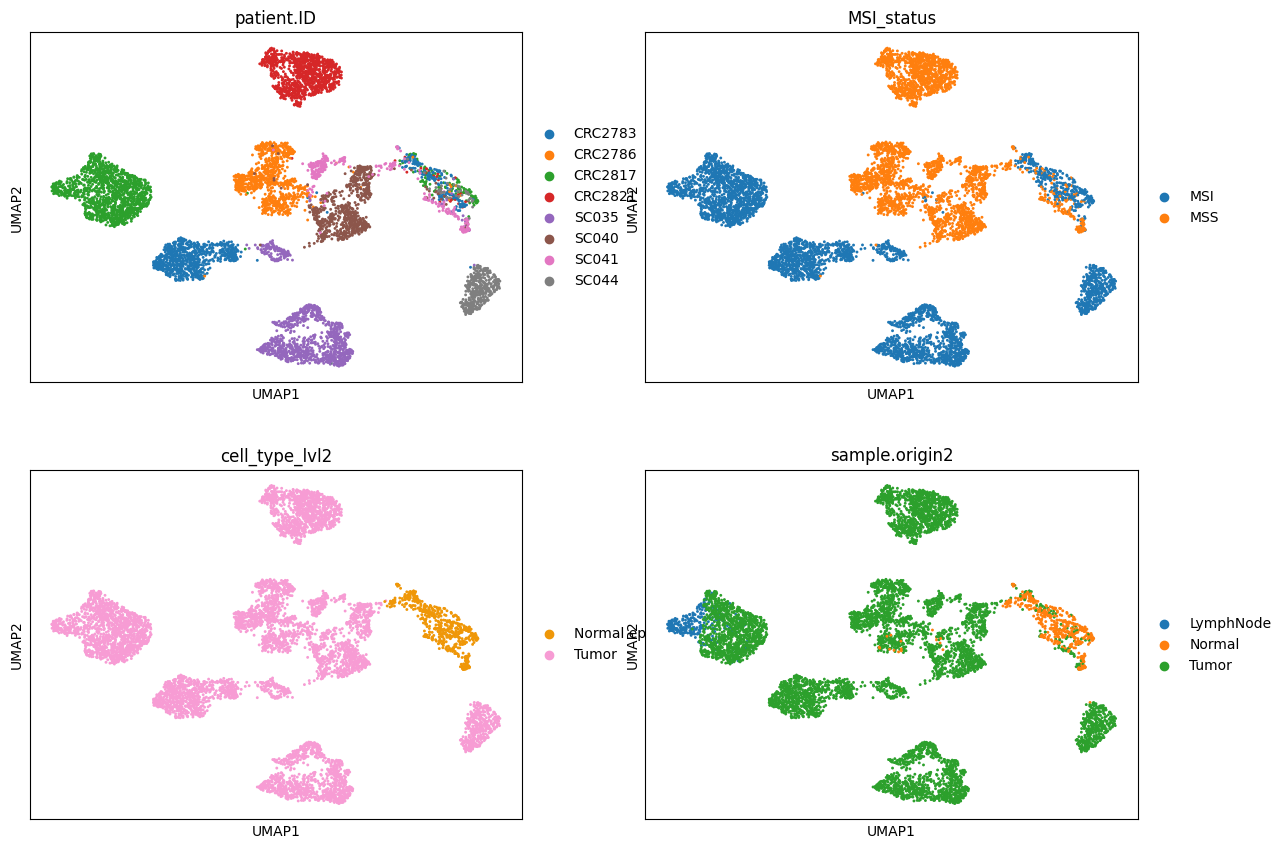

In [17]:
sc.pl.umap(adata_joanito, color=['patient.ID', 'MSI_status', 'cell_type_lvl2', 'sample.origin2'], ncols=2)

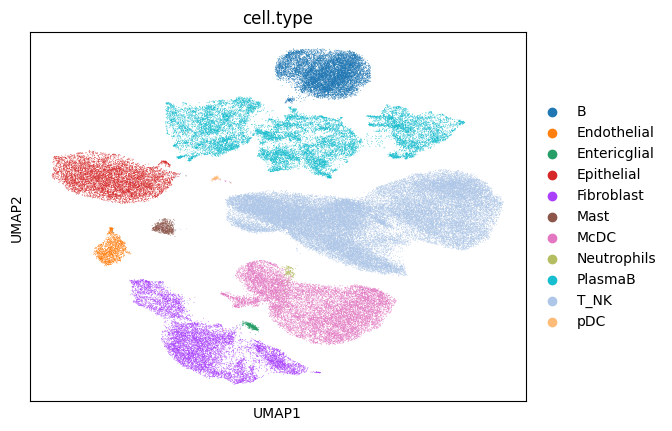

In [9]:
sc.pl.umap(adata_joanito, color=['cell.type'])

In [6]:
adata_chen

AnnData object with n_obs × n_vars = 180323 × 2243
    obs: 'HRR_id', 'SampleID', 'PatientID', 'TreatmentStage', 'BiopsySite', 'TMB', 'Response', 'doublet_score', 'predicted_doublet', 'Identifier', 'Author_MajorCellType', 'Author_SubCellType', 'Dataset', 'leiden', 'Enterocytes', 'Stem', 'Goblet', 'Identifier2', 'AvgSTRDiff', 'StdSTRDiff', 'NumSTRLoci', 'cell_type_isTumor', 'iCMS2_up', 'iCMS2_dw', 'iCMS3_up', 'iCMS3_dw'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Author_SubCellType_colors', 'BiopsySite_colors', 'PatientID_colors', 'Response_colors', 'SampleID_colors', 'cell_type_isTumor_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'